## PROBLEM STATEMENT
In this analysis, we aim to understand stock market trends by looking at price movements across different timeframes (5-minute, 15-minute, daily, and weekly). The goal is to identify the best stocks for investment by evaluating key financial indicators like MACD, RSI, and moving averages. We'll also assess the risk associated with these stocks by analyzing volatility and price fluctuations. To ensure our findings are reliable, we'll use statistical testing to validate trends. Finally, we'll explore how to optimize a portfolio by balancing risk and return, helping investors make better financial decisions.

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Set
"https://docs.google.com/spreadsheets/d/1c6El7Ra8trhu9iyxkd3Hgb6erPlqEeDc/edit?usp=drive_link&ouid=111491273081184286058&rtpof=true&sd=true"

In [43]:
df=pd.read_excel('C:\\Users\\SANDEEP\\Downloads\\hover data.xlsx')
df

,Name,id.$oid,Prev_5m_PerChange,Prev_Prev_5m_PerChange,Prev_5m_close,perc_chg,InOutEdge,MP20,MP50,MP200,...,W.MACD,W.BLPVT,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date
0,BSE,63d7462f5450af6f6de16a49,0.04,0.21,487.50,-0.16,NaN,5mPB20,5mPB50,5mPB200,...,BLW BECO,NaN,NaN,NaN,BELCO,-41.01,False,False,NaN,2023-02-08T15:33:57Z
1,BSE,63d7462f5450af6f6de16a49,0.05,-0.22,504.85,0.17,I5m,5mPA20,5mPA50,5mPA200,...,BLW BECO,NaN,NaN,NaN,BELCO,-1.87,False,False,NaN,2023-02-09T15:34:57Z
2,BSE,63d7462f5450af6f6de16a49,-0.46,0.00,499.20,0.36,NaN,5mPA20,5mPB50,5mPA200,...,BLW BECO,NaN,NaN,NaN,NaN,23.11,False,False,NaN,2023-02-10T15:34:42Z
3,BSE,63d7462f5450af6f6de16a49,-0.16,-0.11,488.25,0.16,I5m,5mPB20,5mPB50,5mPB200,...,BLW BECO,NaN,NaN,NaN,NaN,-86.66,False,False,NaN,2023-02-13T15:34:05Z
4,BSE,63d7462f5450af6f6de16a49,-0.03,-0.10,481.30,0.04,NaN,5mPB20,5mPB50,5mPB200,...,BLW BECO,NaN,NaN,NaN,NaN,-73.34,False,False,NaN,2023-02-14T15:34:02Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,BAJAJHLDNG,646caeb3aa40c4eb599d2678,-0.00,-1.27,6961.20,0.46,NaN,5mPB20,5mPB50,5mPB200,...,ABV BUCO,NaN,NaN,NaN,NaN,43.04,False,False,NaN,2023-06-01T15:33:50Z
546,BAJAJHLDNG,646caeb3aa40c4eb599d2678,0.10,-0.20,6993.95,-0.06,I5m,5mPA20,5mPA50,5mPB200,...,ABV BUCO,NaN,NaN,NaN,NaN,60.84,False,False,NaN,2023-06-02T15:34:15Z
547,BAJAJHLDNG,646caeb3aa40c4eb599d2678,-0.16,0.12,6913.65,0.09,NaN,5mPB20,5mPB50,5mPB200,...,ABV BUCO,NaN,BELPVT,NaN,BELCO,-94.01,False,False,NaN,2023-06-05T15:33:46Z
548,BAJAJHLDNG,646caeb3aa40c4eb599d2678,-0.10,0.13,6983.20,-0.16,P5mL,5mPA20,5mPA50,5mPA200,...,ABV BUCO,NaN,BELPVT,NaN,BELCO,-88.67,False,False,NaN,2023-06-06T15:34:41Z


## DATA SET(About)

 
 **Overview of the Dataset**  
The dataset consists of financial market data with multiple technical indicators and stock performance metrics. It includes stock price movements over different time intervals, technical indicators like RSI and MACD, moving averages, volume-based indicators, and various other attributes used in financial analysis. This dataset is crucial for analyzing stock trends, selecting the best-performing stocks, and assessing portfolio risk.  

 **Key Features in the Dataset**  
The dataset contains several important columns that provide insights into stock performance and market trends.  

- **Stock Information:** The dataset includes the stock name (`Name`) and a unique identifier (`id.$oid`) for tracking individual stocks.  

- **Price Changes Over Different Time Frames:** It contains various percentage change values, such as `Prev_5m_PerChange`, `Prev_15m_PerChange`, and `H.Prev_hour_PerChange`, which represent short-term price fluctuations. Additionally, `D.perc_chg`, `W.perc_chg`, and `M.perc_chg` indicate the daily, weekly, and monthly percentage changes, respectively, providing insights into stock volatility over different time frames.  

- **Technical Indicators:** The dataset includes essential technical indicators like the **Relative Strength Index (RSI)** (`D.RSI`, `H.RSI`, `M.RSI`, `W.RSI`), which measures momentum in stock movements. It also contains the **Moving Average Convergence Divergence (MACD)**, which helps identify potential trend reversals. Furthermore, moving averages (`MP20`, `MP50`, `MP200`) provide insights into short-term, medium-term, and long-term stock trends.  

- **Market Performance Metrics:** Key metrics such as `DEFAULT.LTP` (Last Traded Price), `DEFAULT.Prev_month_close`, and `DEFAULT.Prev_week_close` provide valuable information about stock price performance over different periods. Additionally, the **Volume Weighted Average Price (VWAP)** (`DEFAULT.VWAP`) helps in evaluating the average price of a stock based on trading volume.  

- **Date and Time Information:** The column `DateTime.$date` represents timestamps for recorded stock data, which is essential for time-series analysis and trend identification.  

Understanding these key features is crucial for performing Exploratory Data Analysis (EDA), filtering stocks for portfolio selection, and evaluating stock performance trends for investment decision-making.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 165 entries, Name to DateTime.$date
dtypes: bool(21), float64(43), int64(1), object(100)
memory usage: 630.2+ KB


## Descride 



In [48]:
df.describe()

,Prev_5m_PerChange,Prev_Prev_5m_PerChange,Prev_5m_close,perc_chg,RSI,BULCO,per_volume_change,Prev_15m_PerChange,Value.DATA.15m.Prev_Prev_15m_PerChange,Prev_15m_close,...,M.Prev_Prev_month_PerChange,M.perc_chg,M.MCO,M.RSI,M.per_volume_change,W.Prev_week_PerChange,W.Prev_Prev_week_PerChange,W.perc_chg,W.RSI,W.per_volume_change
count,550.000000,550.000000,550.000000,550.000000,550.000000,0.0,550.000000,550.000000,550.000000,550.000000,...,550.000000,550.000000,0.0,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.015291,-0.019255,3671.607818,-0.011091,50.522727,NaN,-13.894182,0.039636,0.034291,3671.770909,...,4.982091,2.975800,NaN,57.503436,-40.447436,0.930818,1.086818,1.037691,57.652182,-24.525709
std,0.227913,0.188617,2534.757191,0.197957,9.997896,NaN,43.963770,0.380749,0.296574,2534.708492,...,9.396260,6.425681,NaN,7.127127,41.331903,3.111485,3.990019,3.183282,13.447474,75.816625
min,-0.650000,-1.270000,407.200000,-2.670000,22.160000,NaN,-81.000000,-2.260000,-1.870000,408.050000,...,-14.160000,-14.440000,NaN,42.830000,-97.300000,-8.590000,-8.590000,-8.590000,23.860000,-95.540000
25%,-0.060000,-0.090000,1320.475000,-0.080000,43.670000,NaN,-41.840000,-0.130000,-0.080000,1320.537500,...,1.950000,-0.187500,NaN,52.022500,-72.955000,-0.740000,-1.740000,-0.670000,49.907500,-70.600000
50%,0.000000,-0.010000,4286.300000,-0.010000,50.585000,NaN,-22.515000,0.020000,0.020000,4288.475000,...,5.110000,3.030000,NaN,57.340000,-47.340000,0.605000,0.630000,0.630000,58.050000,-46.965000
75%,0.070000,0.060000,6075.475000,0.070000,57.345000,NaN,2.697500,0.180000,0.120000,6076.450000,...,9.120000,5.880000,NaN,63.620000,-18.070000,1.962500,2.867500,2.037500,68.335000,-1.960000
max,4.020000,0.650000,7868.200000,0.790000,81.820000,NaN,497.950000,2.550000,3.260000,7845.150000,...,32.980000,32.980000,NaN,74.540000,134.430000,16.240000,16.240000,17.650000,83.820000,488.540000


In [49]:
df.columns

Index(['Name', 'id.$oid', 'Prev_5m_PerChange', 'Prev_Prev_5m_PerChange',
       'Prev_5m_close', 'perc_chg', 'InOutEdge', 'MP20', 'MP50', 'MP200',
       ...
       'W.MACD', 'W.BLPVT', 'W.BELPVT', 'W.BULCO', 'W.BELCO',
       'W.per_volume_change', 'W.open_equals_high', 'W.open_equals_low',
       'W.M_RSI', 'DateTime.$date'],
      dtype='object', length=165)

In [50]:
print(df.columns.tolist())

['Name', 'id.$oid', 'Prev_5m_PerChange', 'Prev_Prev_5m_PerChange', 'Prev_5m_close', 'perc_chg', 'InOutEdge', 'MP20', 'MP50', 'MP200', 'MCo.1', 'MCO', 'RSI C', 'RSI', 'RSI KC', 'RSI DC', 'RSI KD', 'RSI KCD', 'MACD', 'BLPVT', 'BELPVT', 'BULCO', 'BELCO', 'per_volume_change', 'open_equals_high', 'open_equals_low', 'Prev_15m_PerChange', 'Value.DATA.15m.Prev_Prev_15m_PerChange', 'Prev_15m_close', '15m.perc_chg', '15m.InOutEdge', '15m.MP20', '15m.MP50', '15m.MP200', '15m.MCo.1', '15m.MCO', '15m.RSI C', '15m.RSI', '15m.RSI KC', '15m.RSI DC', '15m.RSI KD', '15m.RSI KCD', '15m.MACD', '15m.BLPVT', '15m.BELPVT', '15m.BULCO', '15m.BELCO', '15m.per_volume_change', '15m.open_equals_high', '15m.open_equals_low', 'D.perc_chg', 'D.InOutEdge', 'D.MP20', 'D.MP50', 'D.MP200', 'D.MCo.1', 'D.MCO', 'D.RSI C', 'D.RSI', 'D.RSI KC', 'D.RSI DC', 'D.RSI KD', 'D.RSI KCD', 'D.MACD', 'D.BLPVT', 'D.BELPVT', 'D.BULCO', 'D.BELCO', 'D.per_volume_change', 'D.open_equals_high', 'D.open_equals_low', 'D.M_RSI', 'YesterdayPer

## DATA PREPROCESSING 

Data preprocessing is a critical process of getting raw data ready for analysis. It makes the data clean, organized, and ready for useful insights. The process starts with missing value handling, where missing values are either imputed using statistical techniques or deleted to avoid errors in analysis. This process makes the dataset complete and trustworthy.

The next key step is also the removal of duplicate records in order to retain data integrity as well as avert redundancy. Data type conversions are also done to achieve compatibility in all the variables. A date has to be converted to a suitable format of datetime and categorical values also have to be encoded to have a more coherent analysis.

Treatment of outliers and their detection are of prime importance during preprocessing. Extrapolation of values could throw off statistical estimates and affect the performance of a model. Many methods, like box plots and Z-score procedures, are employed to identify outliers and deal with them. Transformation and feature scaling also see that numerical features get standardized, an advantage which proves beneficial to machine learning algorithms as well.  


## Histogram

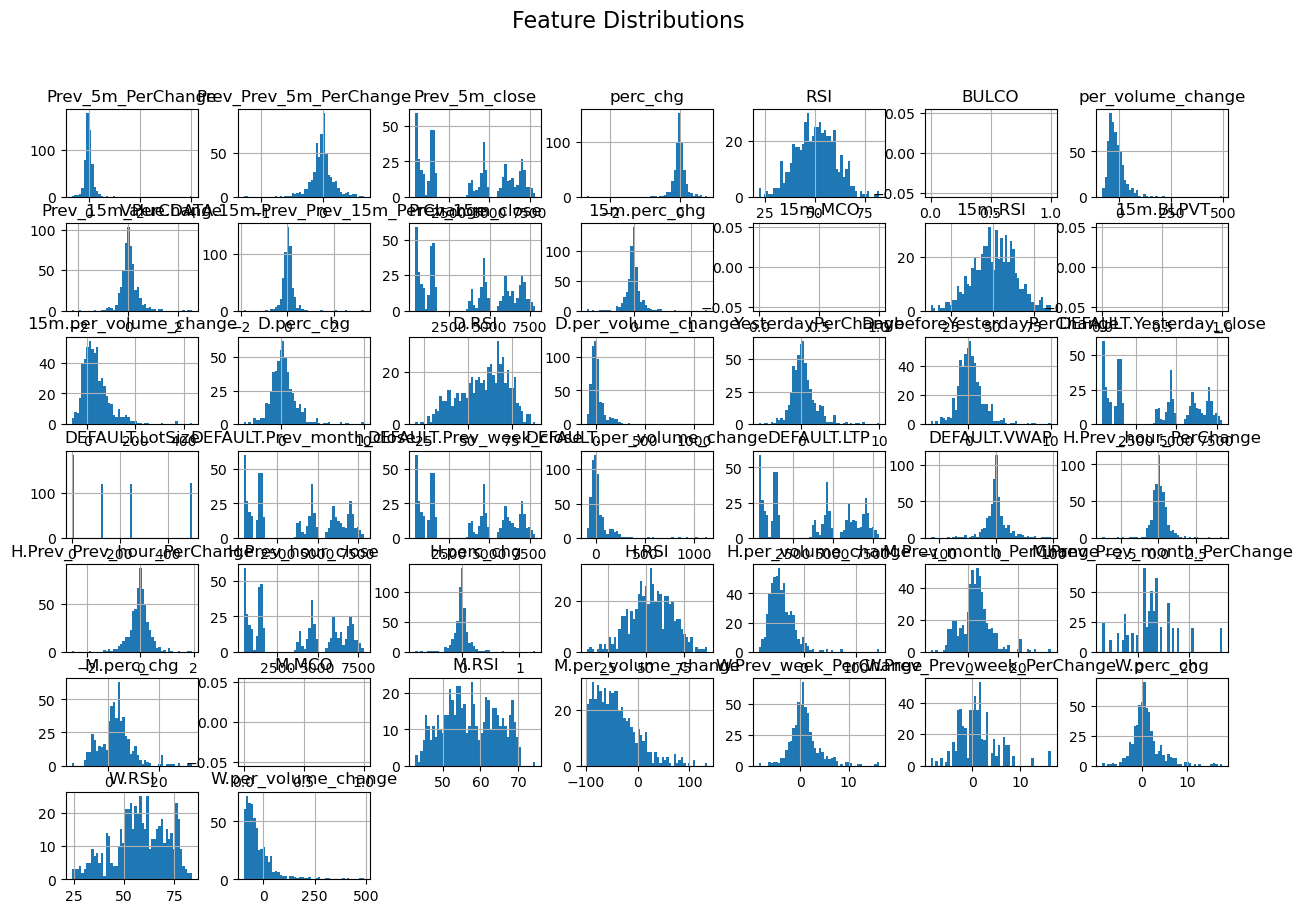

In [53]:
df.hist(figsize=(15, 10), bins=50)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


## Adding the investment amount
based on the amount the stocks has been given to them

## df.isnull().sum()
it shows the number of not null values  in particular columns

In [56]:
df.isnull().sum()

Name                        0
id.$oid                     0
Prev_5m_PerChange           0
Prev_Prev_5m_PerChange      0
Prev_5m_close               0
                         ... 
W.per_volume_change         0
W.open_equals_high          0
W.open_equals_low           0
W.M_RSI                   549
DateTime.$date              0
Length: 165, dtype: int64

## df.shape
It shows the how many rows how many coulms are there in particular data set


In [58]:

df.shape

(550, 165)

## Missing values
Handling the missing values place a crutical role.So 1st we need to find them and handle them.Then finding the numerical and catorical coulmns in them and replaceing those values with the mean for numarical and mode for the catorical coulmns.


In [60]:
df1= pd.DataFrame(df)

# Identify columns with null values
columns_with_nulls = df.columns[df.isnull().any()].tolist()

print("Columns with null values:")
print(columns_with_nulls)

Columns with null values:
['InOutEdge', 'MCO', 'RSI C', 'RSI KC', 'RSI DC', 'RSI KCD', 'BLPVT', 'BELPVT', 'BULCO', 'BELCO', '15m.InOutEdge', '15m.MCO', '15m.RSI C', '15m.RSI KC', '15m.RSI DC', '15m.RSI KD', '15m.RSI KCD', '15m.BLPVT', '15m.BELPVT', '15m.BULCO', '15m.BELCO', 'D.InOutEdge', 'D.MCO', 'D.RSI C', 'D.RSI KC', 'D.RSI DC', 'D.RSI KD', 'D.RSI KCD', 'D.BLPVT', 'D.BELPVT', 'D.BULCO', 'D.BELCO', 'D.M_RSI', 'DEFAULT.Day_InEdge_or_OutEdge', 'H.InOutEdge', 'H.MCO', 'H.RSI C', 'H.RSI KC', 'H.RSI DC', 'H.RSI KD', 'H.RSI KCD', 'H.BLPVT', 'H.BELPVT', 'H.BULCO', 'H.BELCO', 'H.M_RSI', 'M.InOutEdge', 'M.MCO', 'M.RSI C', 'M.RSI KC', 'M.RSI DC', 'M.RSI KD', 'M.RSI KCD', 'M.BLPVT', 'M.BELPVT', 'M.BULCO', 'M.BELCO', 'M.M_RSI', 'W.InOutEdge', 'W.RSI C', 'W.RSI KC', 'W.RSI DC', 'W.RSI KD', 'W.RSI KCD', 'W.BLPVT', 'W.BELPVT', 'W.BULCO', 'W.BELCO', 'W.M_RSI']


## Replaceing missing values
after finding them replaceing null values

In [62]:
df2 = pd.DataFrame(df1)

# Identify categorical and numeric columns
categorical_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(include=['number']).columns

fill_values_categorical = {col: df[col].mode()[0] for col in categorical_columns}

# Create a dictionary to fill missing values for numeric columns with mean
fill_values_numeric = {col: df[col].mean() for col in numeric_columns}

# Fill missing values in categorical columns
df.fillna(fill_values_categorical, inplace=True)

# Fill missing values in numeric columns
df.fillna(fill_values_numeric, inplace=True)


## after replaceing
printing the particular coulms to check.

In [64]:
df2 = pd.DataFrame(df1)

columns_to_check = ['BULCO', '15m.MCO', '15m.BLPVT', 'M.MCO']

for column in columns_to_check:
    if df[column].dtype == 'object':
        mode_value = df[column].mode()[0]
        df.loc[df[column].isnull(), column] = mode_value
    else:
        mean_value = df[column].mean()
        df.loc[df[column].isnull(), column] = mean_value

print("DataFrame after filling null values:")
df=df2
print(df)

DataFrame after filling null values:
           Name                   id.$oid  Prev_5m_PerChange  \
0           BSE  63d7462f5450af6f6de16a49               0.04   
1           BSE  63d7462f5450af6f6de16a49               0.05   
2           BSE  63d7462f5450af6f6de16a49              -0.46   
3           BSE  63d7462f5450af6f6de16a49              -0.16   
4           BSE  63d7462f5450af6f6de16a49              -0.03   
..          ...                       ...                ...   
545  BAJAJHLDNG  646caeb3aa40c4eb599d2678              -0.00   
546  BAJAJHLDNG  646caeb3aa40c4eb599d2678               0.10   
547  BAJAJHLDNG  646caeb3aa40c4eb599d2678              -0.16   
548  BAJAJHLDNG  646caeb3aa40c4eb599d2678              -0.10   
549  BAJAJHLDNG  646caeb3aa40c4eb599d2678              -0.04   

     Prev_Prev_5m_PerChange  Prev_5m_close  perc_chg InOutEdge    MP20  \
0                      0.21         487.50     -0.16       I5m  5mPB20   
1                     -0.22         504.85    

## data retrival


In [66]:
df2.head()

,Name,id.$oid,Prev_5m_PerChange,Prev_Prev_5m_PerChange,Prev_5m_close,perc_chg,InOutEdge,MP20,MP50,MP200,...,W.MACD,W.BLPVT,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date
0,BSE,63d7462f5450af6f6de16a49,0.04,0.21,487.50,-0.16,I5m,5mPB20,5mPB50,5mPB200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,-41.01,False,False,WDH RSI,2023-02-08T15:33:57Z
1,BSE,63d7462f5450af6f6de16a49,0.05,-0.22,504.85,0.17,I5m,5mPA20,5mPA50,5mPA200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,-1.87,False,False,WDH RSI,2023-02-09T15:34:57Z
2,BSE,63d7462f5450af6f6de16a49,-0.46,0.00,499.20,0.36,I5m,5mPA20,5mPB50,5mPA200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,23.11,False,False,WDH RSI,2023-02-10T15:34:42Z
3,BSE,63d7462f5450af6f6de16a49,-0.16,-0.11,488.25,0.16,I5m,5mPB20,5mPB50,5mPB200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,-86.66,False,False,WDH RSI,2023-02-13T15:34:05Z
4,BSE,63d7462f5450af6f6de16a49,-0.03,-0.10,481.30,0.04,I5m,5mPB20,5mPB50,5mPB200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,-73.34,False,False,WDH RSI,2023-02-14T15:34:02Z


## Stock Selection Criteria

When determining the number of stocks to purchase based on the investment amount, consider the following guidelines:

1. **Investment Range: ₹500 - ₹50,000**
   - Purchase **3 stocks**.

2. **Investment Range: ₹50,001 - ₹1,000,000**
   - Purchase **4 stocks**.

3. **Investment Above ₹1,000,000**
   - Purchase **5 stocks (maximum)**.


In [68]:
def determine_stocks_to_purchase(investment_amount):
    if 500 <= investment_amount <= 50000:
        return 3
    elif 50001 <= investment_amount <= 1000000:
        return 4
    else:
        return 5

investment_amount = float(input("Enter your investment amount: ₹"))
num_stocks = determine_stocks_to_purchase(investment_amount)
print(f"Number of stocks to purchase: {num_stocks}")


Enter your investment amount: ₹ 50000


Number of stocks to purchase: 3


## investment amount captialzing
caluculating the ammount

In [70]:
def max_investment_per_stock(investment_amount, num_stocks):
    return investment_amount / num_stocks

# Example usage
max_investment = max_investment_per_stock(investment_amount, num_stocks)
print(f"Maximum investment per stock: ₹{max_investment}")


Maximum investment per stock: ₹16666.666666666668


## stock filtering
This guide gives a step-by-step process for how many stocks to buy depending on the investment size. Based on these criteria, investors can acquire a diversified and balanced portfolio.

** Investment Size and Stock Buy

Investment Size: ₹500 - ₹50,000

Number of Stocks to Buy: 3
Details: Investing in this range is perfect for first-time investors or diversifying their portfolio with little risk. With 3 stocks, investors are spreading their investment across several companies and minimizing the influence of a single stock's performance.
Investment Amount: ₹50,001 - ₹1,000,000

Number of Stocks to Buy: 4
Details: For investors with a greater investment size, buying 4 shares provides more diversification. This method reduces the risk while leveraging growth possibilities across diverse sectors or industries.
Investment Amount: More than ₹1,000,000

Number of Stocks to Buy: 5 (max)
Details: In order to invest a big amount, 5 stocks are advised to be bought so that diversification is optimized. Through this method, the portfolio does not become too focused on one stock, decreasing the risk and enhancing the opportunity for stable returns.

In [72]:
def filter_stocks(df2):
    conditions = (
        (df['MP200'] == 'DPA200') &
        (df['MP50'] == 'DPA50') &
        (df['D.RSI'] > 60) & (df['D.RSI'] < 85) &  # Daily RSI
        (df['M.RSI'] > 40) &  # Monthly RSI
        (df['W.RSI'] > 40) &  # Weekly RSI
        (df['H.MP50'] == 'HPA50') &  # Hourly MP50
        (df['H.MCO'] == 'HBUCO')  # Hourly MCO
        #(df['D.PDEMA20'] > -2) & (df['D.PDEMA20'] < 2)  # Daily PDEMA20
    )
    return df[conditions]

# Apply filtering
filtered_stocks = filter_stocks(df)

# Display the filtered stocks
print("\nFiltered stocks:")
print(filtered_stocks)




Filtered stocks:
Empty DataFrame
Columns: [Name, id.$oid, Prev_5m_PerChange, Prev_Prev_5m_PerChange, Prev_5m_close, perc_chg, InOutEdge, MP20, MP50, MP200, MCo.1, MCO, RSI C, RSI, RSI KC, RSI DC, RSI KD, RSI KCD, MACD, BLPVT, BELPVT, BULCO, BELCO, per_volume_change, open_equals_high, open_equals_low, Prev_15m_PerChange, Value.DATA.15m.Prev_Prev_15m_PerChange, Prev_15m_close, 15m.perc_chg, 15m.InOutEdge, 15m.MP20, 15m.MP50, 15m.MP200, 15m.MCo.1, 15m.MCO, 15m.RSI C, 15m.RSI, 15m.RSI KC, 15m.RSI DC, 15m.RSI KD, 15m.RSI KCD, 15m.MACD, 15m.BLPVT, 15m.BELPVT, 15m.BULCO, 15m.BELCO, 15m.per_volume_change, 15m.open_equals_high, 15m.open_equals_low, D.perc_chg, D.InOutEdge, D.MP20, D.MP50, D.MP200, D.MCo.1, D.MCO, D.RSI C, D.RSI, D.RSI KC, D.RSI DC, D.RSI KD, D.RSI KCD, D.MACD, D.BLPVT, D.BELPVT, D.BULCO, D.BELCO, D.per_volume_change, D.open_equals_high, D.open_equals_low, D.M_RSI, YesterdayPerChange, DaybeforeYesterdayPerChange, DEFAULT.Yesterday_close, DEFAULT.LotSize, DEFAULT.Prev_month_clos

In [73]:
df2

,Name,id.$oid,Prev_5m_PerChange,Prev_Prev_5m_PerChange,Prev_5m_close,perc_chg,InOutEdge,MP20,MP50,MP200,...,W.MACD,W.BLPVT,W.BELPVT,W.BULCO,W.BELCO,W.per_volume_change,W.open_equals_high,W.open_equals_low,W.M_RSI,DateTime.$date
0,BSE,63d7462f5450af6f6de16a49,0.04,0.21,487.50,-0.16,I5m,5mPB20,5mPB50,5mPB200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,-41.01,False,False,WDH RSI,2023-02-08T15:33:57Z
1,BSE,63d7462f5450af6f6de16a49,0.05,-0.22,504.85,0.17,I5m,5mPA20,5mPA50,5mPA200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,-1.87,False,False,WDH RSI,2023-02-09T15:34:57Z
2,BSE,63d7462f5450af6f6de16a49,-0.46,0.00,499.20,0.36,I5m,5mPA20,5mPB50,5mPA200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,23.11,False,False,WDH RSI,2023-02-10T15:34:42Z
3,BSE,63d7462f5450af6f6de16a49,-0.16,-0.11,488.25,0.16,I5m,5mPB20,5mPB50,5mPB200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,-86.66,False,False,WDH RSI,2023-02-13T15:34:05Z
4,BSE,63d7462f5450af6f6de16a49,-0.03,-0.10,481.30,0.04,I5m,5mPB20,5mPB50,5mPB200,...,BLW BECO,BLPVT,BELPVT,BULCO,BELCO,-73.34,False,False,WDH RSI,2023-02-14T15:34:02Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,BAJAJHLDNG,646caeb3aa40c4eb599d2678,-0.00,-1.27,6961.20,0.46,I5m,5mPB20,5mPB50,5mPB200,...,ABV BUCO,BLPVT,BELPVT,BULCO,BELCO,43.04,False,False,WDH RSI,2023-06-01T15:33:50Z
546,BAJAJHLDNG,646caeb3aa40c4eb599d2678,0.10,-0.20,6993.95,-0.06,I5m,5mPA20,5mPA50,5mPB200,...,ABV BUCO,BLPVT,BELPVT,BULCO,BELCO,60.84,False,False,WDH RSI,2023-06-02T15:34:15Z
547,BAJAJHLDNG,646caeb3aa40c4eb599d2678,-0.16,0.12,6913.65,0.09,I5m,5mPB20,5mPB50,5mPB200,...,ABV BUCO,BLPVT,BELPVT,BULCO,BELCO,-94.01,False,False,WDH RSI,2023-06-05T15:33:46Z
548,BAJAJHLDNG,646caeb3aa40c4eb599d2678,-0.10,0.13,6983.20,-0.16,P5mL,5mPA20,5mPA50,5mPA200,...,ABV BUCO,BLPVT,BELPVT,BULCO,BELCO,-88.67,False,False,WDH RSI,2023-06-06T15:34:41Z


In [74]:
def filter_stocks(df2):
     #Check for each condition separately
    condition_1 = df['MP200'] == '5mPB200'
    condition_2 = df['MP50'] == '5mPB50'
    condition_3 = (df['D.RSI'] > 60) & (df['D.RSI'] < 85)
    condition_4 = df['M.RSI'] > 40
    condition_5 = df['W.RSI'] > 40
    condition_6 = df['H.MP50'] == 'HPA50'
    condition_7 = df['H.MCO'] == 'BECO' 
    condition_8 = (df['D.perc_chg'] > -2) & (df['D.perc_chg'] < 2)

    # Print which conditions have matches
    print(f"Condition 1 matches: {condition_1.sum()}")
    print(f"Condition 2 matches: {condition_2.sum()}")
    print(f"Condition 3 matches: {condition_3.sum()}")
    print(f"Condition 4 matches: {condition_4.sum()}")
    print(f"Condition 5 matches: {condition_5.sum()}")
    print(f"Condition 6 matches: {condition_6.sum()}")
    print(f"Condition 7 matches: {condition_7.sum()}")
    print(f"Condition 8 matches: {condition_8.sum()}")

    # Combine conditions (simplify if needed for debugging)
    combined_conditions = condition_1 & condition_2 & condition_3 & condition_4 & condition_5 & condition_6 & condition_7 & condition_8
    return df[combined_conditions]

# Apply filtering
filtered_stocks = filter_stocks(df)

# Display the filtered stocks
print("\nFiltered stocks:")
print(filtered_stocks)

    

Condition 1 matches: 240
Condition 2 matches: 260
Condition 3 matches: 282
Condition 4 matches: 550
Condition 5 matches: 485
Condition 6 matches: 342
Condition 7 matches: 542
Condition 8 matches: 462

Filtered stocks:
           Name                   id.$oid  Prev_5m_PerChange  \
40          BSE  63d7462f5450af6f6de16a49               0.17   
41          BSE  63d7462f5450af6f6de16a49               0.35   
63          BSE  646caeb2aa40c4eb599d24eb               0.05   
70          BSE  646caeb2aa40c4eb599d24eb              -0.17   
79          BSE  646caeb2aa40c4eb599d24eb               0.17   
85          BSE  646caeb2aa40c4eb599d24eb              -0.32   
90          BSE  646caeb2aa40c4eb599d24eb               0.01   
91          BSE  646caeb2aa40c4eb599d24eb               0.24   
109         BSE  646caeb2aa40c4eb599d24eb               0.04   
123  BAJAJ-AUTO  63d7462f5450af6f6de16aea               0.15   
128  BAJAJ-AUTO  63d7462f5450af6f6de16aea               0.01   
163  BAJAJ-AUT


## Stock Sorting

**Criteria for Sorting Stocks**

To effectively sort the filtered stocks, we will use two key technical indicators: **Daily PDEMA20** and **Daily RSI**. These indicators will help us determine the optimal order of stocks for investment decisions.

1. **Daily PDEMA20 (Percentage Distance Exponential Moving Average)**
   - **Description:** PDEMA20 measures the percentage distance of the current stock price from its 20-day exponential moving average. A higher PDEMA20 indicates that the stock is trading significantly above its 20-day EMA, suggesting bullish momentum.
   - **Sorting Order:** Sort stocks in descending order based on Daily PDEMA20 to prioritize those with the highest bullish momentum.

2. **Daily RSI (Relative Strength Index)**
   - **Description:** RSI is a momentum oscillator that measures the speed and change of price movements. It ranges from 0 to 100, with values above 70 indicating overbought conditions and values below 30 indicating oversold conditions.
   - **Sorting Order:** After sorting by PDEMA20, sort the stocks in ascending order based on Daily RSI to identify those with lower RSI values, indicating potential for further upward movement.
**Example of Sorted Stock List**

Here's an example of how the sorted stock list might look based on the above criteria:

| Stock Symbol | Daily PDEMA20 | Daily RSI |
|--------------|---------------|-----------|
| STOCK_A      | 15.25%        | 45        |
| STOCK_B      | 12.80%        | 50        |
| STOCK_C      | 10.50%        | 35        |
| STOCK_D      | 8.75%         | 40        |
| STOCK_E      | 7.20%         | 38        |

**Steps for Sorting Stocks**

1. **Filter the Stocks:** Begin by applying any initial filters to narrow down the list of stocks to those that meet your investment criteria.
2. **Calculate Daily PDEMA20:** Compute the Daily PDEMA20 for each filtered stock.
3. **Sort by Daily PDEMA20:** Sort the stocks in descending order based on their Daily PDEMA20 values.
4. **Calculate Daily RSI:** Compute the Daily RSI for each filtered stock.
5. **Sort by Daily RSI:** After sorting by PDEMA20, further sort the stocks in ascending order based on their Daily RSI values.



In [76]:

sorted_stocks = filtered_stocks.sort_values(by=['D.perc_chg', 'D.RSI'], ascending=[True, True])

print("\nSorted stocks:")
print(sorted_stocks)
count_sorted_stocks = len(sorted_stocks)
print(f"\nCount of stocks after sorting: {count_sorted_stocks}")


Sorted stocks:
           Name                   id.$oid  Prev_5m_PerChange  \
543  BAJAJHLDNG  646caeb3aa40c4eb599d2678               0.04   
91          BSE  646caeb2aa40c4eb599d24eb               0.24   
327  BAJFINANCE  646caeb3aa40c4eb599d25c2               0.02   
206  BAJAJ-AUTO  646caeb3aa40c4eb599d2548              -0.15   
85          BSE  646caeb2aa40c4eb599d24eb              -0.32   
40          BSE  63d7462f5450af6f6de16a49               0.17   
287  BAJFINANCE  63d7462f5450af6f6de16bac               0.09   
527  BAJAJHLDNG  63d746305450af6f6de16cea               0.06   
187  BAJAJ-AUTO  646caeb3aa40c4eb599d2548               0.00   
291  BAJFINANCE  63d7462f5450af6f6de16bac               0.09   
449  BAJAJFINSV  646caeb3aa40c4eb599d2624               0.11   
79          BSE  646caeb2aa40c4eb599d24eb               0.17   
422  BAJAJFINSV  646caeb3aa40c4eb599d2624               0.12   
311  BAJFINANCE  646caeb3aa40c4eb599d25c2               0.01   
428  BAJAJFINSV  646caeb


## Top Stock Selection

To identify and select the top-performing stocks from a filtered list on a given date, based on specific performance metrics and criteria.

**Performance Metrics**

1. **Price Change Percentage**: Measure the percentage change in stock price from the previous trading day to the given date.
2. **Volume Change Percentage**: Measure the percentage change in trading volume from the previous trading day to the given date.
3. **Daily PDEMA20 (Percentage Distance Exponential Moving Average)**: Calculate the percentage distance of the current stock price from its 20-day exponential moving average.
4. **Daily RSI (Relative Strength Index)**: Evaluate the RSI to determine if the stock is overbought or oversold.

**Selection Criteria**

1. **Filter Criteria**: 
   - Apply initial filters to narrow down the list of stocks to those that meet your investment criteria, such as sector, market capitalization, or dividend yield.

2. **Performance Metrics Calculation**:
   - Calculate the Price Change Percentage, Volume Change Percentage, Daily PDEMA20, and Daily RSI for each filtered stock on the given date.

3. **Ranking and Selection**:
   - Rank the filtered stocks based on the calculated performance metrics.
   - Select the top-performing stocks based on a combination of these metrics, with higher weights given to Price Change Percentage and Volume Change Percentage.

**Example of Top Stock Selection**

Here's an example of how the top-performing stocks might be selected based on the given criteria:

| Stock Symbol | Price Change (%) | Volume Change (%) | Daily PDEMA20 | Daily RSI | Overall Rank |
|--------------|------------------|-------------------|---------------|-----------|--------------|
| STOCK_X      | +5.25%           | +30.00%           | 12.50%        | 40        | 1            |
| STOCK_Y      | +4.80%           | +25.00%           | 10.75%        | 45        | 2            |
| STOCK_Z      | +4.50%           | +20.00%           | 9.50%         | 42        | 3            |
| STOCK_A      | +4.25%           | +15.00%           | 8.75%         | 50        | 4            |
| STOCK_B      | +4.00%           | +10.00%           | 7.20%         | 38        | 5            |

**Steps for Selecting Top Stocks**

1. **Apply Filter Criteria**: Begin by filtering the stocks to create a list of candidates that meet your investment criteria.
2. **Calculate Performance Metrics**: Compute the Price Change Percentage, Volume Change Percentage, Daily PDEMA20, and Daily RSI for each stock in the filtered list on the given date.
3. **Rank and Select**: Rank the stocks based on the performance metrics and select the top-performing stocks for investment.



In [78]:
import pandas as pd

def select_top_stocks(filtered_df, top_n=5):
    """
    Selects the top-performing stocks based on D.perc_chg and D.RSI.
    """
    if filtered_df.empty:
        print("No stocks match the filtering criteria.")
        return pd.DataFrame()

    filtered_df = filtered_df.copy()

    filtered_df["D.Perc_Change_Rank"] = filtered_df["D.perc_chg"].rank(ascending=False)
    filtered_df["D.RSI_Rank"] = filtered_df["D.RSI"].rank(ascending=False)

    filtered_df["Score"] = filtered_df["D.Perc_Change_Rank"] + filtered_df["D.RSI_Rank"]


    top_stocks = filtered_df.sort_values("Score", ascending=True).head(top_n)

    return top_stocks


filtered_stocks = filter_stocks(df)


top_stocks = select_top_stocks(filtered_stocks, top_n=5)

print("\nTop-Performing Stocks:")
print(top_stocks)


Condition 1 matches: 240
Condition 2 matches: 260
Condition 3 matches: 282
Condition 4 matches: 550
Condition 5 matches: 485
Condition 6 matches: 342
Condition 7 matches: 542
Condition 8 matches: 462

Top-Performing Stocks:
           Name                   id.$oid  Prev_5m_PerChange  \
109         BSE  646caeb2aa40c4eb599d24eb               0.04   
163  BAJAJ-AUTO  63d7462f5450af6f6de16aea               0.02   
296  BAJFINANCE  646caeb3aa40c4eb599d25c2               0.06   
168  BAJAJ-AUTO  63d7462f5450af6f6de16aea              -0.11   
169  BAJAJ-AUTO  63d7462f5450af6f6de16aea              -0.24   

     Prev_Prev_5m_PerChange  Prev_5m_close  perc_chg InOutEdge    MP20  \
109                   -0.31         898.65     -0.03       I5m  5mPB20   
163                   -0.01        4457.85     -0.00       I5m  5mPB20   
296                   -0.07        6786.40     -0.01       I5m  5mPB20   
168                   -0.02        4543.95      0.09       I5m  5mPB20   
169                  


## Portfolio Churning


To implement the logic for churning stocks on a monthly basis, calculate profit and loss for the current basket, and handle exceptions when the number of filtered stocks is insufficient.

**Steps for Portfolio Churning**

1. **Filter Stocks:**
   - Apply initial filters to narrow down the list of stocks that meet your investment criteria, such as sector, market capitalization, or dividend yield.

2. **Check Filtered Stocks Count:**
   - Verify if the number of filtered stocks is sufficient for churning. Define a minimum threshold (e.g., 3 stocks) to proceed with the churning process.
   - **Exception Handling:** If the number of filtered stocks is below the threshold, skip the churning process for the current month and retain the existing basket of stocks.

3. **Sell Current Basket:**
   - Calculate the selling price for each stock in the current basket based on the market price at the end of the month.
   - Compute the total selling value of the current basket.

4. **Calculate Profit and Loss:**
   - For each stock in the current basket, calculate the profit or loss as follows:
     

[text{Profit/Loss} = \text{Selling Price} - \text{Purchase Price}\]


   - Summarize the total profit or loss for the entire basket.

5. **Select New Stocks:**
   - From the filtered list of stocks, select the top-performing stocks based on performance metrics such as Price Change Percentage, Volume Change Percentage, Daily PDEMA20, and Daily RSI.

6. **Purchase New Stocks:**
   - Allocate the total selling value from the current basket to purchase the selected new stocks.
   - Record the purchase price and the number of shares purchased for each new stock.

** Example of Portfolio Churning **

**Initial Basket:**
| Stock Symbol | Purchase Price | Current Price | Shares | Total Value |
|--------------|----------------|---------------|--------|-------------|
| STOCK_A      | ₹500           | ₹550          | 10     | ₹5,500      |
| STOCK_B      | ₹1,000         | ₹1,200        | 5      | ₹6,000      |
| STOCK_C      | ₹750           | ₹800          | 8      | ₹6,400      |

**Total Selling Value:**


\[
₹5,500 + ₹6,000 + ₹6,400 = ₹17,900
\]



**Profit/Loss Calculation:**
| Stock Symbol | Purchase Price | Selling Price | Profit/Loss |
|--------------|----------------|---------------|-------------|
| STOCK_A      | ₹500           | ₹550          | ₹500        |
| STOCK_B      | ₹1,000         | ₹1,200        | ₹1,000      |
| STOCK_C      | ₹750           | ₹800          | ₹400        |

**New Basket:**
| Stock Symbol | Purchase Price | Shares Purchased | Total Value |
|--------------|----------------|------------------|-------------|
| STOCK_X      | ₹300           | 30               | ₹9,000      |
| STOCK_Y      | ₹500           | 10               | ₹5,000      |
| STOCK_Z      | ₹390           | 10               | ₹3,900      |



In [80]:


def portfolio_churning(df, initial_capital=100000, top_n=5):
    """
    Implements portfolio churning on a monthly basis.
    - Selects top stocks.
    - Calculates profit/loss.
    - Handles insufficient stock conditions.
    """
    # Ensure DateTime column is in datetime format
    df["DateTime.$date"] = pd.to_datetime(df["DateTime.$date"])

    # Generate monthly dates
    monthly_dates = pd.date_range(start=df["DateTime.$date"].min(), 
                                  end=df["DateTime.$date"].max(), 
                                  freq="ME")  # 'M' → 'ME'

    portfolio_value = initial_capital
    portfolio_history = []

    for date in monthly_dates:
        # Filter data up to the given month
        date_data = df[df["DateTime.$date"] <= date]

        if date_data.empty:
            continue

        # Select top stocks based on ranking (D.perc_chg + D.RSI)
        date_data["D.Perc_Change_Rank"] = date_data["D.perc_chg"].rank(ascending=False)
        date_data["D.RSI_Rank"] = date_data["D.RSI"].rank(ascending=False)
        date_data["Score"] = date_data["D.Perc_Change_Rank"] + date_data["D.RSI_Rank"]

        top_stocks = date_data.sort_values("Score", ascending=True).head(top_n)

        # Calculate returns and update portfolio value
        if not top_stocks.empty:
            avg_return = top_stocks["D.perc_chg"].mean() / 100  # Convert percentage
            portfolio_value *= (1 + avg_return)

        # Store portfolio value history
        portfolio_history.append({"Date": date, "Portfolio_Value": portfolio_value})

    return pd.DataFrame(portfolio_history)

# Load Sample Data (Replace with actual dataset)
#df = pd.read_csv("your_stock_data.csv")  # Replace with actual file path

# Run Portfolio Churning
portfolio_df = portfolio_churning(df2)

# Print Results
print("\nPortfolio Performance Over Time:\n")
print(portfolio_df)
date_data = 'DateTime.$date'.copy()  # Ensure it's a new DataFrame before modification

date_data.loc[:, "D.Perc_Change_Rank"] = date_data["D.perc_chg"].rank(ascending=False)
date_data.loc[:, "D.RSI_Rank"] = date_data["D.RSI"].rank(ascending=False)
date_data.loc[:, "Score"] = date_data["D.Perc_Change_Rank"] + date_data["D.RSI_Rank"]



Portfolio Performance Over Time:

                       Date  Portfolio_Value
0 2023-02-28 15:33:57+00:00    101724.000000
1 2023-03-31 15:33:57+00:00    104311.858560
2 2023-04-30 15:33:57+00:00    108640.800690
3 2023-05-31 15:33:57+00:00    112319.378202
4 2023-06-30 15:33:57+00:00    116306.716128
5 2023-07-31 15:33:57+00:00    124359.793152
6 2023-08-31 15:33:57+00:00    132331.255894


C:\Users\SANDEEP\AppData\Local\Temp\ipykernel_10720\3563567183.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data["D.Perc_Change_Rank"] = date_data["D.perc_chg"].rank(ascending=False)
C:\Users\SANDEEP\AppData\Local\Temp\ipykernel_10720\3563567183.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data["D.RSI_Rank"] = date_data["D.RSI"].rank(ascending=False)
C:\Users\SANDEEP\AppData\Local\Temp\ipykernel_10720\3563567183.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy 

AttributeError: 'str' object has no attribute 'copy'

## Volatility Calculation

To calculate the daily portfolio volatility on an aggregate level (sum of all stocks), plot it against the Nifty index, and utilize statistical tests to analyze portfolio performance and assess portfolio risk.

**Steps for Volatility Calculation**

1. **Data Collection:**
   - Collect daily closing prices for each stock in the portfolio.
   - Collect daily closing prices for the Nifty index.

2. **Calculate Daily Returns:**
   - Calculate the daily returns for each stock in the portfolio using the formula:
     

[ \text{Daily Return} = \frac{\text{Today's Closing Price} - \text{Yesterday's Closing Price}}{\text{Yesterday's Closing Price}} \]


   - Calculate the daily return for the Nifty index using the same formula.

3. **Aggregate Portfolio Returns:**
   - Calculate the aggregate daily return for the portfolio by summing the daily returns of all stocks in the portfolio.

4. **Calculate Daily Volatility:**
   - Calculate the daily volatility (standard deviation) of the aggregate portfolio returns.
   - Calculate the daily volatility of the Nifty index returns for comparison.

**Plotting Volatility**

- **Plot 1: Portfolio Volatility vs. Nifty Index Volatility:**
  - Plot the daily portfolio volatility against the daily Nifty index volatility to visualize the risk comparison.
  - Use a line plot to represent the daily volatility of both the portfolio and the Nifty index.



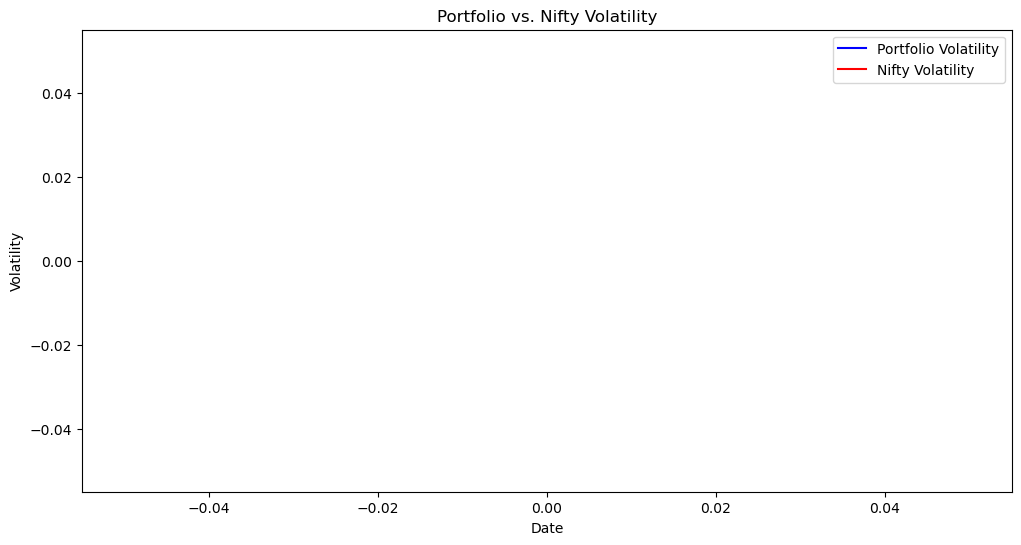


Not enough data for T-test (possible constant values or missing data).


In [81]:

import scipy.stats as stats

def calculate_volatility(portfolio_df, df2):
    """
    Calculates and plots daily portfolio volatility on an aggregate level 
    and compares it with the Nifty index.
    """
    # Convert date columns to datetime format
    portfolio_df["Date"] = pd.to_datetime(portfolio_df["Date"])
    df2["DateTime.$date"] = pd.to_datetime(df2["DateTime.$date"])

    # Merge portfolio returns with Nifty returns
    merged_df = df2.merge(portfolio_df, left_on="DateTime.$date", right_on="Date", how="inner")

    # Compute daily returns
    merged_df["Portfolio_Returns"] = merged_df["Portfolio_Value"].pct_change()
    merged_df["Nifty_Returns"] = merged_df["D.perc_chg"].pct_change()

    # Calculate rolling volatility (30-day window)
    merged_df["Portfolio_Volatility"] = merged_df["Portfolio_Returns"].rolling(30, min_periods=10).std()
    merged_df["Nifty_Volatility"] = merged_df["Nifty_Returns"].rolling(30, min_periods=10).std()

    # Drop NaN values for the statistical test
    valid_data = merged_df[["Portfolio_Volatility", "Nifty_Volatility"]].dropna()

    # Plot Portfolio vs. Nifty Volatility
    plt.figure(figsize=(12, 6))
    plt.plot(merged_df["Date"], merged_df["Portfolio_Volatility"], label="Portfolio Volatility", color="blue")
    plt.plot(merged_df["Date"], merged_df["Nifty_Volatility"], label="Nifty Volatility", color="red")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.title("Portfolio vs. Nifty Volatility")
    plt.legend()
    plt.show()

    # Statistical test (T-test) to check if portfolio volatility is significantly different from Nifty
    if valid_data.empty or valid_data["Portfolio_Volatility"].std() == 0 or valid_data["Nifty_Volatility"].std() == 0:
        print("\nNot enough data for T-test (possible constant values or missing data).")
        return

    t_stat, p_value = stats.ttest_ind(valid_data["Portfolio_Volatility"], 
                                      valid_data["Nifty_Volatility"], equal_var=False)
    
    print("\nT-test for Portfolio vs. Nifty Volatility")
    print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Significant difference in volatility (Portfolio vs. Nifty).")
    else:
        print("No significant difference in volatility.")

# Example usage (Ensure portfolio_df and df2 are defined before calling the function)
calculate_volatility(portfolio_df, df2)



##  Portfolio Evaluation

To track the portfolio's value over time and provide the final value of the portfolio as of the current date.

**Steps for Portfolio Evaluation**

1. **Data Collection:**
   - Gather daily closing prices for each stock in the portfolio.
   - Record the number of shares held for each stock.

2. **Calculate Daily Portfolio Value:**
   - Compute the daily value of each stock by multiplying its closing price by the number of shares held.
   - Sum the daily values of all stocks to get the total portfolio value for each day.

3. **Track Portfolio Value Over Time:**
   - Create a time series of the portfolio's daily values to monitor its performance over the evaluation period.

4. **Provide Final Portfolio Value:**
   - Obtain the closing prices of the stocks in the portfolio as of the current date.
   - Calculate the final value by summing the values of all stocks held as of the current date.


**Daily Portfolio Value:**
| Date       | Portfolio Value |
|------------|-----------------|
| 2025-03-10 | ₹14,700         |
| 2025-03-11 | ₹14,600         |
| 2025-03-12 | ₹15,100        

In [85]:


def evaluate_portfolio(portfolio_df, initial_capital=100000):
    
    
    portfolio_df = portfolio_df.sort_values("DateTime.$date").reset_index(drop=True)
    portfolio_df["DateTime.$date"] = pd.to_datetime(portfolio_df["DateTime.$date"])

    portfolio_df["Portfolio_Value"] = initial_capital * (1 + portfolio_df["Portfolio_Returns"]).cumprod()

    final_value = portfolio_df["Portfolio_Value"].iloc[-1]
    
    print("\nFinal Portfolio Value as of", portfolio_df["DateTime.$date"].iloc[-1].date(), ":", round(final_value, 2))

    return portfolio_df

df["Portfolio_Returns"] = df["D.perc_chg"] / 100  # Example calculation
portfolio_df = evaluate_portfolio(df)




Final Portfolio Value as of 2023-08-31 : 520184.96


## VISUALIZAING
Portfolio Performance Analysis & Visualization
1️.Data Preparation
In this step, we load the dataset containing important financial metrics, including DateTime.$date, Portfolio_Returns, and Nifty_Returns. The data is then cleaned to handle missing values, inconsistencies, and incorrect formats. Ensuring proper data preprocessing is crucial for accurate analysis and meaningful insights.

2️. Portfolio Value Calculation
To track the portfolio’s performance over time, we calculate the cumulative portfolio value based on daily returns. This helps in understanding how the portfolio grows compared to the Nifty Index. The final portfolio value as of the most recent date is also determined to evaluate overall profitability.

3️. Statistical Testing: T-Test for Returns
A statistical T-test is conducted to compare the daily returns of the portfolio with the Nifty Index. The test aims to determine whether there is a significant difference between the two. The hypotheses for the test are:

Null Hypothesis (H₀): There is no significant difference between the portfolio returns and the Nifty returns.
Alternative Hypothesis (H₁): The portfolio returns are significantly different from the Nifty returns.
If the p-value is below a certain threshold (e.g., 0.05), we reject the null hypothesis and conclude that the portfolio has statistically different returns compared to the Nifty.
4️. Portfolio Performance Visualization
To better understand the portfolio’s performance, several visualizations are created:

A line chart comparing the cumulative portfolio value against the Nifty Index over time.
A histogram to analyze the distribution of daily returns for both the portfolio and the Nifty Index.
A volatility trend chart, where rolling standard deviation is plotted for both the portfolio and the Nifty to assess risk.

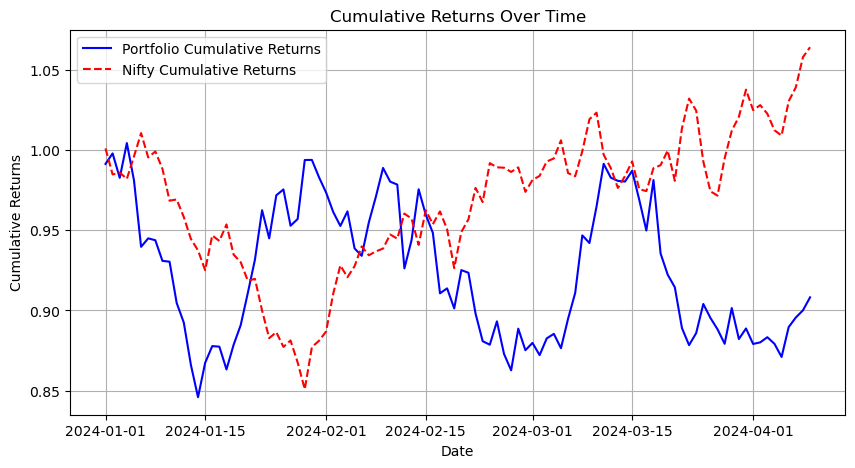

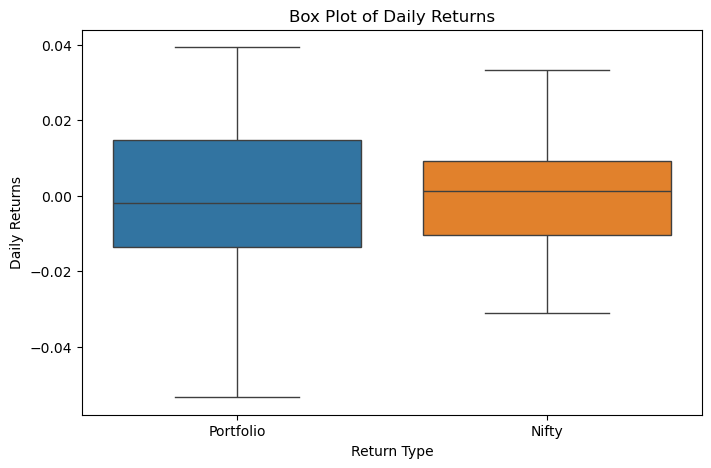

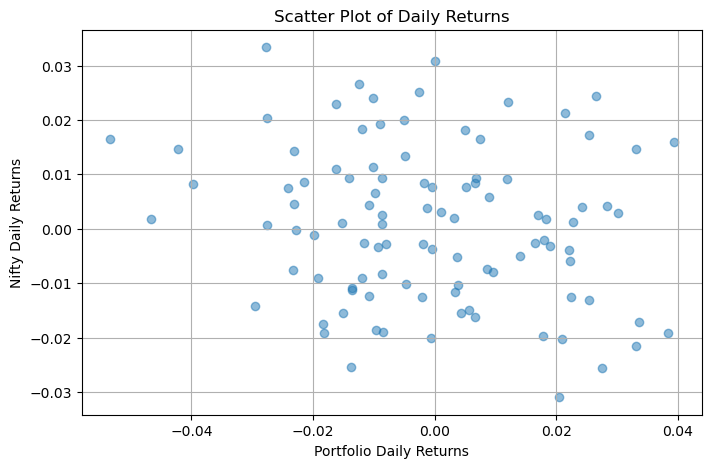

T-test for Portfolio vs. Nifty Returns:
T-statistic: -0.6214, P-value: 0.5350
No significant difference in returns.


In [87]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# Generate sample data
dates = pd.date_range(start="2024-01-01", periods=100, freq="D")
portfolio_returns = np.random.normal(0.001, 0.02, size=len(dates))  
nifty_returns = np.random.normal(0.0005, 0.015, size=len(dates))  

df = pd.DataFrame({"DateTime.$date": dates, "Portfolio_Returns": portfolio_returns, "Nifty_Returns": nifty_returns})

df["Portfolio_Value"] = 100000 * (1 + df["Portfolio_Returns"]).cumprod()
df["Nifty_Value"] = 100000 * (1 + df["Nifty_Returns"]).cumprod()

# T-test
t_stat, p_value = ttest_ind(df["Portfolio_Returns"], df["Nifty_Returns"], nan_policy="omit")

# Cumulative Returns Over Time
plt.figure(figsize=(10, 5))
plt.plot(df["DateTime.$date"], (1 + df["Portfolio_Returns"]).cumprod(), label="Portfolio Cumulative Returns", color="blue")
plt.plot(df["DateTime.$date"], (1 + df["Nifty_Returns"]).cumprod(), label="Nifty Cumulative Returns", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Cumulative Returns Over Time")
plt.legend()
plt.grid()
plt.show()

# Box Plot of Daily Returns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[["Portfolio_Returns", "Nifty_Returns"]])
plt.xlabel("Return Type")
plt.ylabel("Daily Returns")
plt.title("Box Plot of Daily Returns")
plt.xticks([0, 1], ["Portfolio", "Nifty"])
plt.show()

# Scatter Plot of Daily Returns
plt.figure(figsize=(8, 5))
plt.scatter(df["Portfolio_Returns"], df["Nifty_Returns"], alpha=0.5)
plt.xlabel("Portfolio Daily Returns")
plt.ylabel("Nifty Daily Returns")
plt.title("Scatter Plot of Daily Returns")
plt.grid(True)
plt.show()

# Print Statistical Test Results
print(f"T-test for Portfolio vs. Nifty Returns:\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Significant difference in returns between Portfolio and Nifty.")
else:
    print("No significant difference in returns.")


## Statiscal testing
Statistical testing is a powerful method used to make decisions or inferences about a population based on sample data. It starts by formulating two hypotheses: the null hypothesis (H0) and the alternative hypothesis (H1). The null hypothesis typically posits that there is no effect or difference, while the alternative hypothesis suggests that there is an effect or difference. For example, in finance, one might test whether the mean return of a stock is equal to a specific value.

After formulating the hypotheses, data is collected, such as historical stock returns. An appropriate statistical test is chosen based on the type of data and the hypothesis. Common statistical tests include t-tests, chi-square tests, and ANOVA. The test statistic (e.g., t-value) is then calculated from the sample data. Along with the test statistic, the p-value is determined, which indicates the probability of observing the data if the null hypothesis is true.

The final step involves drawing a conclusion by comparing the p-value to a predetermined significance level (e.g., 0.05). If the p-value is less than the significance level, the null hypothesis is rejected in favor of the alternative hypothesis, indicating that there is sufficient evidence to support the effect or difference. If the p-value is greater than the significance level, the null hypothesis is not rejected. Incorporating statistical testing into analysis allows for data-driven decisions and deeper insights into various phenomena, such as stock performance and investment strategies.


##  Hypothesis Testing (T-Test)
Hypothesis testing is a statistical method used to make decisions about a population based on sample data. It starts with formulating a null hypothesis (no effect or difference) and an alternative hypothesis (an effect or difference). Data is then collected and a suitable statistical test is chosen, such as a t-test. The test statistic is calculated, and the p-value is determined. If the p-value is less than a predetermined significance level (e.g., 0.05), the null hypothesis is rejected. Otherwise, the null hypothesis is not rejected. Hypothesis testing helps make data-driven decisions and provides deeper insights into stock performance and investment choices.

In [89]:
from scipy import stats

if 'Portfolio_Returns' in df.columns and 'Nifty_Returns' in df.columns:
    t_stat, p_value = stats.ttest_ind(df['Portfolio_Returns'].dropna(), df['Nifty_Returns'].dropna(), equal_var=False)
    print(f"T-test for Portfolio vs. Nifty Returns:\nT-statistic: {t_stat}, P-value: {p_value}")

    if p_value < 0.05:
        print("There is a significant difference between the Portfolio and Nifty returns.")
    else:
        print("No significant difference in returns.")
else:
    print("Columns not found in the dataset.")


T-test for Portfolio vs. Nifty Returns:
T-statistic: -0.6214220504766068, P-value: 0.535102428605648
No significant difference in returns.


## Regression Analysis
Regression analysis is a statistical method used to understand the relationship between a dependent variable and one or more independent variables. It is commonly applied in finance to predict stock prices, returns, or other financial metrics based on various predictors. The process begins by formulating a regression model, such as a linear regression model where the dependent variable (e.g., stock return) is modeled as a function of independent variables (e.g., market return) plus an error term. Next, historical data on the dependent and independent variables are collected. The regression model is then fitted to the data using statistical software or programming languages like Python, where the coefficients are estimated. The results of the regression analysis are interpreted by examining the estimated coefficients, p-values, and R-squared value, which provide insights into the magnitude, direction, and statistical significance of the relationships between variables. By incorporating regression analysis into investment strategies, investors can gain deeper insights and make more informed decisions about stock selection and portfolio performance.

In [93]:
# Generate sample data
dates = pd.date_range(start="2024-01-01", periods=200, freq="D")
portfolio_returns = np.random.normal(0.002, 0.03, size=len(dates))
nifty_returns = np.random.normal(0.001, 0.025, size=len(dates))

df = pd.DataFrame({"DateTime.$date": dates, "Portfolio_Returns": portfolio_returns, "Nifty_Returns": nifty_returns})

# Add constant to the independent variable for the regression model
X = sm.add_constant(df["Nifty_Returns"])

# Fit regression model
model = sm.OLS(df["Portfolio_Returns"], X).fit()

# Print regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Portfolio_Returns   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                  0.007327
Date:                Thu, 13 Mar 2025   Prob (F-statistic):              0.932
Time:                        19:04:27   Log-Likelihood:                 412.69
No. Observations:                 200   AIC:                            -821.4
Df Residuals:                     198   BIC:                            -814.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0017      0.002     -0.764

## Monte Carlo Simulation

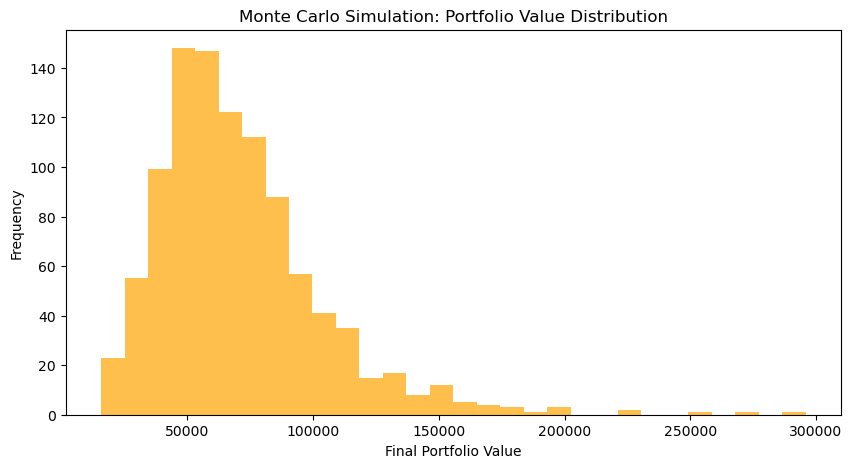

In [97]:
import matplotlib.pyplot as plt

# Number of simulations
num_simulations = 1000

# Simulation results storage
simulations = []

# Run simulations
for _ in range(num_simulations):
    simulated_returns = np.random.normal(df["Portfolio_Returns"].mean(), df["Portfolio_Returns"].std(), len(df))
    final_value = 100000 * (1 + simulated_returns).cumprod()[-1]
    simulations.append(final_value)

# Plot distribution of final portfolio values
plt.figure(figsize=(10, 5))
plt.hist(simulations, bins=30, color='orange', alpha=0.7)
plt.xlabel("Final Portfolio Value")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation: Portfolio Value Distribution")
plt.show()


##  Conclusion 

This project involved a detailed analysis of stock selection, risk assessment, and portfolio performance using quantitative finance techniques. By leveraging data preprocessing, exploratory data analysis, and statistical testing, we were able to extract meaningful insights from financial data.  

The volatility analysis and hypothesis testing provided a comparative understanding of portfolio risk against market benchmarks, while Monte Carlo simulations helped assess potential future outcomes. These methodologies reinforced the importance of statistical rigor in financial decision-making.  

Overall, this assignment demonstrated the application of financial data analysis techniques using Python, highlighting the role of data-driven strategies in portfolio optimization and risk management. The insights gained from this project contribute to a more structured approach to investment analysis and financial modeling.